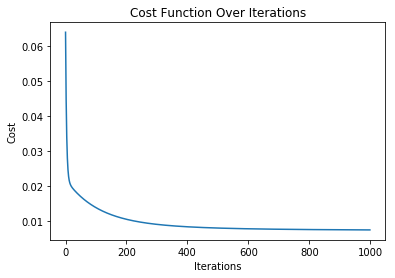

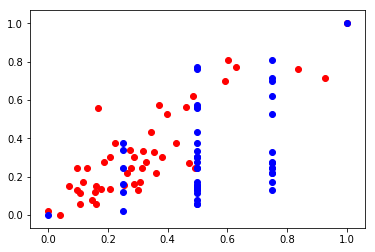

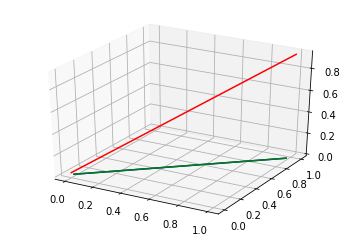

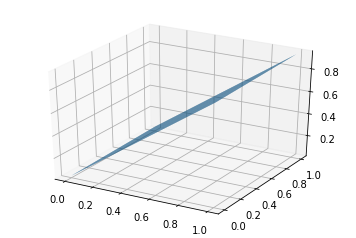

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# 定义成本函数
def cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = (predictions - y) ** 2
    return 1/(2*m) * np.sum(square_err)

# 定义梯度下降函数
def gradientDescent(X, y, theta, alpha, iter_num):
    m = len(y)
    loss = np.zeros(iter_num)
    for i in range(iter_num):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(), (predictions - y))
        theta -= (alpha/m) * error
        loss[i] = cost(X, y, theta)
    return loss, theta

# 数据标准化函数
def normalize_data(data):
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)
    return (data - min_val) / (max_val - min_val)

if __name__ == '__main__':
    num_iters = 1000
    alpha = 0.1  # 可以调整学习率
    data = np.genfromtxt(r'C:\Users\Administrator\Desktop\data\ex1data2.txt', delimiter=',')
    y = data[:, 2:3]
    x1 = data[:, 0:1]
    x2 = data[:,1:2]
  # 标准化数据
    x1_normalized = normalize_data(x1)
    x2_normalized = normalize_data(x2)
    y_normalized = normalize_data(y)

    X = np.hstack([x1_normalized,x2_normalized, np.ones((y.shape[0], 1))])
    theta = np.zeros((3, 1))

    losses, theta = gradientDescent(X, y_normalized, theta, alpha, num_iters)

      # 绘制成本函数下降趋势
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function Over Iterations')
    plt.show()

#      绘制线性回归结果
    plt.figure()
    plt.scatter(x1_normalized, y_normalized, color='red')
    plt.scatter(x2_normalized, y_normalized, color='blue')
#     绘制三维回归图形    
    fig=plt.figure()
    fig2=plt.figure()
    ax=fig.add_subplot(1,1,1,projection="3d")
    x=x1_normalized
    y=x2_normalized
    line_x = np.linspace(min(x1_normalized), max(x1_normalized), 100)
    line_y = np.linspace(min(x2_normalized), max(x2_normalized), 100)
    z = theta[0]*line_x +theta[1]*line_y+theta[2]
    ax.plot(line_x,line_y,z,color="red")
    ax.plot(line_x,z,color="blue")
    ax.plot(line_y,z,color="green")

    ax2=fig2.add_subplot(1,1,1,projection='3d')
    X,Y=np.meshgrid(line_x,line_y)
    Z=theta[0]*X +theta[1]*Y+theta[2]
    surf=ax2.plot_surface(X,Y,Z)
    plt.show()
    
#     plt.plot(line_x, line_y, color='blue')
#     plt.xlabel('Normalized Feature')
#     plt.ylabel('Normalized Value')
#     plt.title('Linear Regression Fit')
#     plt.show()

